In [1]:
#LINEAR REGRESSION, RF AND ANN MODELING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})
print('Done')

Done


In [2]:
df_tot=pd.read_csv('dc_2018q1_clean_1.csv')
df_tot.info()
df_tot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47203 entries, 0 to 47202
Data columns (total 34 columns):
Origin Movement ID                           47203 non-null int64
Destination Movement ID                      47203 non-null int64
Mean Travel Time (Seconds)                   47203 non-null int64
Range - Lower Bound Travel Time (Seconds)    47203 non-null int64
Range - Upper Bound Travel Time (Seconds)    47203 non-null int64
Date                                         47203 non-null object
AWND                                         47203 non-null float64
PRCP                                         47203 non-null float64
SNOW                                         47203 non-null float64
SNWD                                         47203 non-null float64
TAVG                                         47203 non-null int64
TMAX                                         47203 non-null int64
TMIN                                         47203 non-null int64
WSF2                    

,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds),Date,AWND,PRCP,SNOW,SNWD,...,DOW,dst_graph_area_m,dst_clean_intersection_density_km,dst_street_density_km,src_mxbc_node,dst_mxbc_node,dst_railsubway_density_km,spath,epath,circuit
0,186,1,645,480,865,2018-01-07,8.95,0.0,0.0,0.0,...,6,5.015114e+06,46.060764,10503.313887,49762202,49725080,0.0,10504.058,6549.172599,1.603876
1,186,2,1580,1292,1931,2018-01-07,8.95,0.0,0.0,0.0,...,6,2.910236e+06,79.718610,15488.186422,49762202,49745571,0.0,10226.499,9733.047387,1.050699
2,186,3,1173,947,1452,2018-01-07,8.95,0.0,0.0,0.0,...,6,2.583289e+06,30.194068,8810.468252,49762202,49799918,0.0,8465.565,7501.845296,1.128464
3,186,4,1634,1403,1902,2018-01-07,8.95,0.0,0.0,0.0,...,6,5.283216e+06,24.795505,7437.739980,49762202,49788157,0.0,9694.971,8490.096313,1.141915
4,186,5,913,720,1157,2018-01-07,8.95,0.0,0.0,0.0,...,6,1.779070e+06,55.084950,12192.839593,49762202,49743089,0.0,5718.957,5272.930256,1.084588


In [3]:
df_tot=pd.concat([df_tot,pd.get_dummies(data=df_tot['DOW'],prefix='DOW')],axis=1)
df_tot=pd.concat([df_tot,pd.get_dummies(data=df_tot['Month'],prefix='MON')],axis=1)
import datetime
import holidays
dc_holidays = holidays.UnitedStates(state='DC')
Q1_holiday={dc_holidays.get(i) for i in df_tot.Date}
print(Q1_holiday)
df_tot['Workday']=df_tot.Date.apply(lambda x: 1 if (not x in dc_holidays) and (pd.to_datetime(x).weekday()<5) else 0)
df_tot.head()

{"New Year's Day", "Washington's Birthday", None, 'Martin Luther King, Jr. Day'}


,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds),Date,AWND,PRCP,SNOW,SNWD,...,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,MON_1,MON_2,MON_3,Workday
0,186,1,645,480,865,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,186,2,1580,1292,1931,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,186,3,1173,947,1452,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,186,4,1634,1403,1902,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,186,5,913,720,1157,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0


In [4]:
df_tot=df_tot[['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'Month', 'DOW', 'dst_street_density_km',
       'dst_railsubway_density_km', 'spath', 'Workday', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'MON_1', 'MON_2', 'MON_3']]

df_tot.columns = ['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell', 'WT05_Hail', 'WT06_Glaze/Rime',
       'WT08_Smoke/Haze', 'Month', 'Day of Week', 'DSTStrDen',
       'DSTRailDen', 'ShorPth', 'Workday', 'DoW_Mon', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar' ]
df_tot.head()
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47203 entries, 0 to 47202
Data columns (total 29 columns):
Mean Travel Time (Seconds)    47203 non-null int64
Date                          47203 non-null object
AWND                          47203 non-null float64
PRCP                          47203 non-null float64
SNOW                          47203 non-null float64
SNWD                          47203 non-null float64
TAVG                          47203 non-null int64
WT02_HeavyFog                 2577 non-null float64
WT03_Thunder                  535 non-null float64
WT04_IcePell                  1024 non-null float64
WT05_Hail                     0 non-null float64
WT06_Glaze/Rime               523 non-null float64
WT08_Smoke/Haze               1044 non-null float64
Month                         47203 non-null int64
Day of Week                   47203 non-null int64
DSTStrDen                     47203 non-null float64
DSTRailDen                    47203 non-null float64
ShorPth   

In [5]:
#1.1 log transformation of travel time
df_tot['Log_Mean Travel Time']=np.log(df_tot['Mean Travel Time (Seconds)'])
print(df_tot[['Log_Mean Travel Time', 'Mean Travel Time (Seconds)']].head())

   Log_Mean Travel Time  Mean Travel Time (Seconds)
0              6.469250                         645
1              7.365180                        1580
2              7.067320                        1173
3              7.398786                        1634
4              6.816736                         913


In [6]:
df_tot.columns

Index(['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell', 'WT05_Hail',
       'WT06_Glaze/Rime', 'WT08_Smoke/Haze', 'Month', 'Day of Week',
       'DSTStrDen', 'DSTRailDen', 'ShorPth', 'Workday', 'DoW_Mon', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'DoW_Sat', 'DoW_Sun', 'Month_Jan',
       'Month_Feb', 'Month_Mar', 'Log_Mean Travel Time'],
      dtype='object')

In [6]:
#1.2 Wkday / Wkend data spliting 
dropcol=['Mean Travel Time (Seconds)', 'Date', 'AWND', 'SNOW','SNWD',
         'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell', 'WT05_Hail','WT06_Glaze/Rime', 'WT08_Smoke/Haze',
         'Month']
## choose workday data and drop the null columns
df_wkday=df_tot[df_tot['Workday']==1]
stat_wkday=df_wkday.describe().T
wkdaydrop=set(dropcol)
for i in stat_wkday.index: 
    if stat_wkday['std'][i] ==0:
        print(i)
        wkdaydrop.add(i)
print(wkdaydrop)
df_wkday=df_wkday.drop(wkdaydrop,axis=1)
df_wkday.describe().T

WT02_HeavyFog
WT04_IcePell
WT06_Glaze/Rime
WT08_Smoke/Haze
Workday
DoW_Sat
DoW_Sun
{'WT03_Thunder', 'SNOW', 'WT02_HeavyFog', 'Workday', 'DoW_Sat', 'DoW_Sun', 'WT06_Glaze/Rime', 'AWND', 'WT04_IcePell', 'WT08_Smoke/Haze', 'Date', 'Mean Travel Time (Seconds)', 'WT05_Hail', 'Month', 'SNWD'}


,count,mean,std,min,25%,50%,75%,max
PRCP,32279.0,0.054230,0.146901,0.000000,0.000000,0.000000,0.030000,0.870000
TAVG,32279.0,41.789987,10.720233,17.000000,36.000000,40.000000,47.000000,67.000000
Day of Week,32279.0,2.110412,1.376226,0.000000,1.000000,2.000000,3.000000,4.000000
DSTStrDen,32279.0,15393.293008,5784.275885,2186.370621,11291.640689,14622.614265,18934.416556,32944.964144
DSTRailDen,32279.0,0.626651,4.538108,0.000000,0.000000,0.000000,0.000000,84.605391
ShorPth,32279.0,10830.165126,5285.996754,1138.114000,6911.758000,10530.614000,14259.870000,28964.231000
DoW_Mon,32279.0,0.158803,0.365498,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Tue,32279.0,0.208464,0.406216,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Wed,32279.0,0.209238,0.406771,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Thu,32279.0,0.210508,0.407676,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
## choose weekend data and drop the null columns
df_wkend=df_tot[df_tot['Workday']==0]
stat_wkend=df_wkend.describe().T
wkenddrop=set(dropcol)
for i in stat_wkend.index: 
    if stat_wkend['std'][i] ==0:
        print(i)
        wkenddrop.add(i)
print(wkenddrop)
df_wkend=df_wkend.drop(wkenddrop,axis=1)
df_wkend=df_wkend.rename(columns = {'DoW_Mon':'DoW_HDY'})
df_wkend.describe().T


SNWD
WT02_HeavyFog
WT03_Thunder
Workday
DoW_Tue
DoW_Wed
DoW_Thu
DoW_Fri
{'WT03_Thunder', 'SNOW', 'WT02_HeavyFog', 'Workday', 'DoW_Tue', 'DoW_Fri', 'WT06_Glaze/Rime', 'AWND', 'DoW_Wed', 'WT04_IcePell', 'DoW_Thu', 'WT08_Smoke/Haze', 'Date', 'Mean Travel Time (Seconds)', 'WT05_Hail', 'Month', 'SNWD'}


,count,mean,std,min,25%,50%,75%,max
PRCP,14924.0,0.153225,0.333339,0.000000,0.000000,0.000000,0.160000,1.120000
TAVG,14924.0,38.661552,10.708674,15.000000,39.000000,42.000000,45.000000,53.000000
Day of Week,14924.0,4.907397,1.742100,0.000000,5.000000,5.000000,6.000000,6.000000
DSTStrDen,14924.0,15284.893517,5778.211510,2186.370621,11190.819422,14483.940040,18725.251025,32944.964144
DSTRailDen,14924.0,0.615076,4.487522,0.000000,0.000000,0.000000,0.000000,84.605391
ShorPth,14924.0,11009.562216,5380.748629,1138.114000,6992.193000,10698.259000,14402.492000,28964.231000
DoW_HDY,14924.0,0.104530,0.305957,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Sat,14924.0,0.465425,0.498820,0.000000,0.000000,0.000000,1.000000,1.000000
DoW_Sun,14924.0,0.430046,0.495099,0.000000,0.000000,0.000000,1.000000,1.000000
Month_Jan,14924.0,0.354396,0.478346,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
#2. TRAIN-TEST SPLITING; X/y setting; Kfold setting

In [8]:
from sklearn.model_selection import train_test_split
print('Done')

Done


In [9]:
#2.1 FEATURE STAT DESCRIPTION AND TRANSFORMATION 
wkday_tr, wkday_ts = train_test_split(df_wkday, test_size=0.3, stratify=df_wkday['Day of Week'],random_state=2019 )
print(wkday_tr.shape)
print(wkday_ts.shape)
wkend_tr, wkend_ts = train_test_split(df_wkend, test_size=0.3, stratify=df_wkend['Day of Week'],random_state=2019 )
print(wkend_tr.shape)
print(wkend_ts.shape)

(22595, 15)
(9684, 15)
(10446, 13)
(4478, 13)


In [10]:
#2.2 Weekday X and Y seting 
Y_wkdaytr=wkday_tr['Log_Mean Travel Time']
Y_wkdayts=wkday_ts['Log_Mean Travel Time']
print(Y_wkdaytr[0:5],Y_wkdaytr.shape)
print(Y_wkdaytr[0:5],Y_wkdayts.shape)
X_wkdaytr=wkday_tr.drop(['Day of Week','Log_Mean Travel Time'],axis=1)
X_wkdayts=wkday_ts.drop(['Day of Week','Log_Mean Travel Time'],axis=1)
print(X_wkdaytr.columns,X_wkdaytr.shape)
print(X_wkdayts.columns,X_wkdayts.shape)

45565    7.267525
41464    7.229839
22817    6.836259
13029    7.350516
23743    7.261927
Name: Log_Mean Travel Time, dtype: float64 (22595,)
45565    7.267525
41464    7.229839
22817    6.836259
13029    7.350516
23743    7.261927
Name: Log_Mean Travel Time, dtype: float64 (9684,)
Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon',
       'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Jan', 'Month_Feb',
       'Month_Mar'],
      dtype='object') (22595, 13)
Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon',
       'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Jan', 'Month_Feb',
       'Month_Mar'],
      dtype='object') (9684, 13)


In [11]:
#2.3 Weekend X and Y seting 
Y_wkendtr=wkend_tr['Log_Mean Travel Time']
Y_wkendts=wkend_ts['Log_Mean Travel Time']
print(Y_wkendtr[0:5],Y_wkendtr.shape)
print(Y_wkendtr[0:5],Y_wkendts.shape)
X_wkendtr=wkend_tr.drop(['Day of Week','Log_Mean Travel Time'],axis=1)
X_wkendts=wkend_ts.drop(['Day of Week','Log_Mean Travel Time'],axis=1)
print(X_wkendtr.columns,X_wkendtr.shape)
print(X_wkendts.columns,X_wkendts.shape)

10703    7.189922
37027    7.215240
7815     6.860664
3599     7.084226
32739    7.437206
Name: Log_Mean Travel Time, dtype: float64 (10446,)
10703    7.189922
37027    7.215240
7815     6.860664
3599     7.084226
32739    7.437206
Name: Log_Mean Travel Time, dtype: float64 (4478,)
Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY',
       'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar'],
      dtype='object') (10446, 11)
Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY',
       'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar'],
      dtype='object') (4478, 11)


In [12]:
from sklearn.model_selection import KFold
KF=KFold(n_splits=10,shuffle=True,random_state=1234)
KF_wkday=list(KF.split(X_wkdaytr))
KF_wkend=list(KF.split(X_wkendtr))
print(KF_wkday,KF_wkend)

[(array([    0,     1,     2, ..., 22592, 22593, 22594]), array([   13,    14,    26, ..., 22540, 22552, 22554])), (array([    0,     1,     2, ..., 22592, 22593, 22594]), array([    4,    18,    19, ..., 22564, 22574, 22584])), (array([    0,     1,     2, ..., 22591, 22592, 22594]), array([    6,     8,    23, ..., 22586, 22588, 22593])), (array([    0,     1,     2, ..., 22592, 22593, 22594]), array([    5,     9,    29, ..., 22560, 22565, 22570])), (array([    3,     4,     5, ..., 22592, 22593, 22594]), array([    0,     1,     2, ..., 22566, 22571, 22583])), (array([    0,     1,     2, ..., 22590, 22593, 22594]), array([   16,    42,    58, ..., 22587, 22591, 22592])), (array([    0,     1,     2, ..., 22592, 22593, 22594]), array([   11,    21,    38, ..., 22579, 22580, 22582])), (array([    0,     1,     2, ..., 22592, 22593, 22594]), array([   28,    39,    52, ..., 22549, 22562, 22585])), (array([    0,     1,     2, ..., 22591, 22592, 22593]), array([    3,    20,    32, ..

In [13]:
#3. Modeling
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import mlxtend
from sklearn.metrics import mean_squared_error
print('Done')

Done


In [14]:
##3.1 Robust Linear regression  
dummydrop_1=['DoW_Mon','Month_Jan']
dummydrop_2=['DoW_Sun','Month_Jan']
X_wkdaytr_rlm=X_wkdaytr.drop(dummydrop_1,axis=1)
X_wkdayts_rlm=X_wkdayts.drop(dummydrop_1,axis=1)
print(X_wkdaytr_rlm.columns,X_wkdayts_rlm.columns)
X_wkendtr_rlm=X_wkendtr.drop(dummydrop_2,axis=1)
X_wkendts_rlm=X_wkendts.drop(dummydrop_2,axis=1)
print(X_wkendtr_rlm.columns,X_wkendts_rlm.columns)

Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar'],
      dtype='object') Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar'],
      dtype='object')
Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY',
       'DoW_Sat', 'Month_Feb', 'Month_Mar'],
      dtype='object') Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY',
       'DoW_Sat', 'Month_Feb', 'Month_Mar'],
      dtype='object')


In [15]:
### Weekday linear regression 
#### Huberregression with Sequential Forward Floating Selection (SFFS)

##### Find the amount of key features
from sklearn.linear_model import HuberRegressor
hr=HuberRegressor()
print(hr)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [16]:
rlm_wkday = SFS(estimator=hr, 
           k_features=X_wkdaytr_rlm.shape[1], 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',n_jobs=-1,
           cv=KF_wkday)
print(rlm_wkday)
rlm_wkday.fit(X_wkdaytr_rlm,Y_wkdaytr)

SequentialFeatureSelector(clone_estimator=True,
                          cv=[(array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([   13,    14,    26, ..., 22540, 22552, 22554])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    4,    18,    19, ..., 22564, 22574, 22584])),
                              (array([    0,     1,     2, ..., 22591, 22592, 22594]),
                               array([    6,     8,    23, ..., 22586, 22588, 22593])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    5,     9,    29, ..., 22560, 225...
                               array([    3,    20,    32, ..., 22573, 22589, 22594])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([   10,    15,    17, ..., 22575, 22577, 22590]))]

SequentialFeatureSelector(clone_estimator=True,
                          cv=[(array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([   13,    14,    26, ..., 22540, 22552, 22554])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    4,    18,    19, ..., 22564, 22574, 22584])),
                              (array([    0,     1,     2, ..., 22591, 22592, 22594]),
                               array([    6,     8,    23, ..., 22586, 22588, 22593])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    5,     9,    29, ..., 22560, 225...
                               array([    3,    20,    32, ..., 22573, 22589, 22594])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([   10,    15,    17, ..., 22575, 22577, 22590]))]

<Figure size 1080x2160 with 0 Axes>

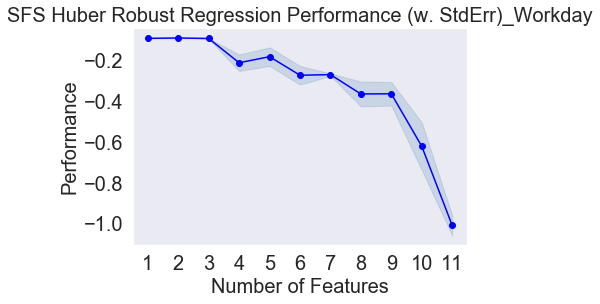

1    -0.0937043
2    -0.0918451
3    -0.0943223
4     -0.213114
5     -0.183367
6     -0.274103
7     -0.271083
8     -0.365815
9     -0.364916
10    -0.621491
11     -1.00864
Name: avg_score, dtype: object [('ShorPth',) ('DSTStrDen', 'ShorPth') ('PRCP', 'DSTStrDen', 'ShorPth')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Fri')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Wed', 'DoW_Fri')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb')
 ('PRCP', 'DSTStrDen', 'ShorPth', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar')]


In [34]:
plt.figure(figsize=(15, 30))
fig = plot_sfs(rlm_wkday.get_metric_dict(), kind='std_err')
plt.title('SFS Huber Robust Regression Performance (w. StdErr)_Workday',fontsize=20)
#plt.text(0.6,-0.45,'3 Key Features',fontsize=20,color='r')
#plt.text(1.2,-0.55,'with Neg.MSE = -0.0948951',fontsize=20,color='r')

#plt.arrow(2,-0.4,0.8,0.25,head_width=0.01,head_length=0.1,color='r',shape='full')
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
plt.ylabel('Performance',fontsize=20)
plt.show()
rlm_wk_mtr=day=pd.DataFrame.from_dict(rlm_wkday.get_metric_dict()).T 
print(rlm_wk_mtr['avg_score'],rlm_wk_mtr['feature_names'].values)

In [20]:
###transforming hr key featurs after SFS
X_wkdaytr_hr3=X_wkdaytr[['PRCP', 'DSTStrDen', 'ShorPth']]
print(X_wkdaytr_hr3.head())
X_wkdayts_hr3=X_wkdayts[['PRCP', 'DSTStrDen', 'ShorPth']]
print(X_wkdayts_hr3.head())

       PRCP     DSTStrDen    ShorPth
45565  0.04  13309.186513  18097.723
41464  0.00   2186.370621  28218.574
22817  0.00  18081.107572   8298.044
13029  0.03   5307.496210  21643.232
23743  0.09  17158.319401   7527.730
       PRCP     DSTStrDen    ShorPth
27504  0.00  10125.722764  12244.072
17874  0.00  23904.197120   4679.861
21152  0.00   8867.267590  15398.036
43152  0.05  20738.316766   7351.749
27512  0.00   4302.964676  17012.332


In [21]:
hr_wkday_paragrid_1 = {
    'alpha': [1e-05,1e-04,1e-03,1e-02,1e-01,1,1e01,1e02,1e03,1e04,1e05,1e06,1e07]
                }
print(hr_wkday_paragrid_1)
hr_Wkday_gs_1=GridSearchCV(
            hr,
            hr_wkday_paragrid_1,
            scoring='neg_mean_squared_error',
            cv=KF_wkday,
            return_train_score=True,
            n_jobs=-1
            )
print(hr_Wkday_gs_1)
hr_Wkday_gs_1.fit(X_wkdaytr_hr3,Y_wkdaytr)
print('Fit Done')

{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]}
GridSearchCV(cv=[(array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([   13,    14,    26, ..., 22540, 22552, 22554])),
                 (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([    4,    18,    19, ..., 22564, 22574, 22584])),
                 (array([    0,     1,     2, ..., 22591, 22592, 22594]),
                  array([    6,     8,    23, ..., 22586, 22588, 22593])),
                 (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([    5,     9,    29, ..., 22560, 22565, 22570])),
                 (array([    3,     4,     5, ..., 2259...
             error_score='raise-deprecating',
             estimator=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                      fit_intercept=True, max_iter=100,
                                      tol=1e-05, w

In [22]:
for i in range(len(hr_Wkday_gs_1.cv_results_['params'])):
    print(hr_Wkday_gs_1.cv_results_['params'][i], 'mse.:', hr_Wkday_gs_1.cv_results_['mean_test_score'][i])
print('Best score:', hr_Wkday_gs_1.best_score_)
print("Best parameters via GridSearch", hr_Wkday_gs_1.best_params_)

{'alpha': 1e-05} mse.: -0.09432256786181045
{'alpha': 0.0001} mse.: -0.0943225608405192
{'alpha': 0.001} mse.: -0.0943225617577126
{'alpha': 0.01} mse.: -0.09432256484545234
{'alpha': 0.1} mse.: -0.09432255677485128
{'alpha': 1} mse.: -0.09432248276837973
{'alpha': 10.0} mse.: -0.09432173269656338
{'alpha': 100.0} mse.: -0.0943143070795719
{'alpha': 1000.0} mse.: -0.09424294602656264
{'alpha': 10000.0} mse.: -0.09334422711262608
{'alpha': 100000.0} mse.: -0.09184526133126965
{'alpha': 1000000.0} mse.: -0.09184550455983945
{'alpha': 10000000.0} mse.: -0.09184561636360508
Best score: -0.09184526133126965
Best parameters via GridSearch {'alpha': 100000.0}


In [24]:
Y_hr3_wkday=hr_Wkday_gs_1.predict(X_wkdayts_hr3)
print(Y_hr3_wkday[0:5])
print(Y_wkdayts[0:5])
from sklearn.metrics import mean_squared_error
print('Weekday Huber Robust Regression Prediction (Best features=3):',mean_squared_error(Y_wkdayts,Y_hr3_wkday))


[7.27951387 6.84343541 7.41280063 6.97908999 7.52343292]
27504    7.766417
17874    6.974479
21152    7.379632
43152    7.206377
27512    7.381502
Name: Log_Mean Travel Time, dtype: float64
Weekday Huber Robust Regression Prediction (Best features=3): 0.09067587815865827


In [25]:
### Weekend linear regression 
#### Huberregression with Sequential Forward Floating Selection (SFFS)
rlm_wkend = SFS(estimator=hr, 
           k_features=X_wkendtr_rlm.shape[1], 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',n_jobs=-1,
           cv=KF_wkend)
print(rlm_wkend)
rlm_wkend.fit(X_wkendtr_rlm,Y_wkendtr)
print("Fit Done")

SequentialFeatureSelector(clone_estimator=True,
                          cv=[(array([    0,     3,     4, ..., 10442, 10444, 10445]),
                               array([    1,     2,     5, ..., 10440, 10441, 10443])),
                              (array([    1,     2,     3, ..., 10443, 10444, 10445]),
                               array([    0,     6,    16, ..., 10386, 10389, 10408])),
                              (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                               array([    8,    11,    28, ..., 10393, 10401, 10428])),
                              (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                               array([   37,    56,    59, ..., 10420, 1042...
                              (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                               array([   17,    22,    53, ..., 10423, 10427, 10439])),
                              (array([    0,     1,     2, ..., 10441, 10443, 10444]),

<Figure size 1080x2160 with 0 Axes>

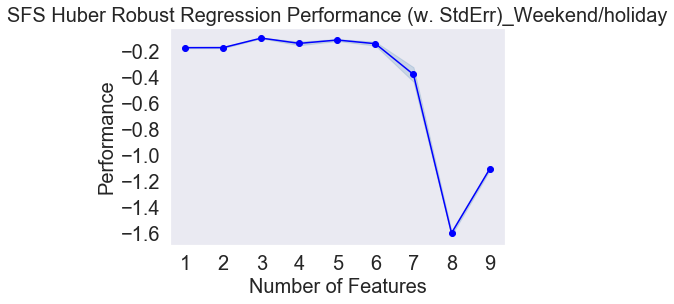

1    -0.173003
2    -0.172603
3   -0.0993647
4    -0.140147
5    -0.114259
6    -0.142556
7    -0.379534
8     -1.60202
9     -1.10947
Name: avg_score, dtype: object [('Month_Mar',) ('DoW_Sat', 'Month_Mar')
 ('ShorPth', 'DoW_Sat', 'Month_Mar')
 ('PRCP', 'ShorPth', 'DoW_Sat', 'Month_Mar')
 ('PRCP', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Mar')
 ('PRCP', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Feb', 'Month_Mar')]


In [35]:
plt.figure(figsize=(15, 30))
fig = plot_sfs(rlm_wkend.get_metric_dict(), kind='std_err')
plt.title('SFS Huber Robust Regression Performance (w. StdErr)_Weekend/holiday',fontsize=20)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
plt.ylabel('Performance',fontsize=20)
plt.show()
rlm_wkend_mtr=day=pd.DataFrame.from_dict(rlm_wkend.get_metric_dict()).T 
print(rlm_wkend_mtr['avg_score'],rlm_wkend_mtr['feature_names'].values)

In [36]:
###transforming hr key featurs after SFS
X_wkendtr_hr3=X_wkendtr[['PRCP', 'ShorPth', 'DoW_Sat', 'Month_Feb', 'Month_Mar']]
print(X_wkendtr_hr3.head())
X_wkendts_hr3=X_wkendts[['PRCP', 'ShorPth', 'DoW_Sat', 'Month_Feb', 'Month_Mar']]
print(X_wkendts_hr3.head())

       PRCP    ShorPth  DoW_Sat  Month_Feb  Month_Mar
10703  0.00  10861.897        1          0          0
37027  0.00  12427.456        0          0          1
7815   0.16   6722.084        0          0          0
3599   1.06  12164.610        1          1          0
32739  0.00  11078.130        1          0          1
       PRCP    ShorPth  DoW_Sat  Month_Feb  Month_Mar
31578  0.00   3558.627        1          0          1
42048  0.17   9891.369        0          1          0
2960   1.05  11369.827        0          1          0
11688  0.11  13024.145        1          0          0
11502  0.11   1243.901        1          0          0


In [37]:
hr_wkend_paragrid_1 = {
    'alpha': [1e-05,1e-04,1e-03,1e-02,1e-01,1,1e01,1e02,1e03,1e04,1e05,1e06,1e07]
                }
print(hr_wkend_paragrid_1)
hr_Wkend_gs_1=GridSearchCV(
            hr,
            hr_wkend_paragrid_1,
            scoring='neg_mean_squared_error',
            cv=KF_wkend,
            return_train_score=True,
            n_jobs=-1
            )
print(hr_Wkend_gs_1)
hr_Wkend_gs_1.fit(X_wkendtr_hr3,Y_wkendtr)
print('Fit Done')

{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]}
GridSearchCV(cv=[(array([    0,     3,     4, ..., 10442, 10444, 10445]),
                  array([    1,     2,     5, ..., 10440, 10441, 10443])),
                 (array([    1,     2,     3, ..., 10443, 10444, 10445]),
                  array([    0,     6,    16, ..., 10386, 10389, 10408])),
                 (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                  array([    8,    11,    28, ..., 10393, 10401, 10428])),
                 (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                  array([   37,    56,    59, ..., 10420, 10426, 10432])),
                 (array([    0,     1,     2, ..., 10443...
             error_score='raise-deprecating',
             estimator=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                      fit_intercept=True, max_iter=100,
                                      tol=1e-05, 

In [38]:
for i in range(len(hr_Wkend_gs_1.cv_results_['params'])):
    print(hr_Wkend_gs_1.cv_results_['params'][i], 'mse.:', hr_Wkend_gs_1.cv_results_['mean_test_score'][i])
print('Best score:', hr_Wkend_gs_1.best_score_)
print("Best parameters via GridSearch", hr_Wkend_gs_1.best_params_)

{'alpha': 1e-05} mse.: -0.15383866568478033
{'alpha': 0.0001} mse.: -0.14497662021369503
{'alpha': 0.001} mse.: -0.14163948327787196
{'alpha': 0.01} mse.: -0.13601579524529891
{'alpha': 0.1} mse.: -0.16373040377009437
{'alpha': 1} mse.: -0.2055380004446626
{'alpha': 10.0} mse.: -0.21720245579050645
{'alpha': 100.0} mse.: -0.13106093257999776
{'alpha': 1000.0} mse.: -0.3196150585148888
{'alpha': 10000.0} mse.: -0.10224452175308556
{'alpha': 100000.0} mse.: -0.10394973966325212
{'alpha': 1000000.0} mse.: -0.10122956937858393
{'alpha': 10000000.0} mse.: -0.0993385778034208
Best score: -0.0993385778034208
Best parameters via GridSearch {'alpha': 10000000.0}


In [39]:
Y_hr3_wkend_pred=hr_Wkend_gs_1.predict(X_wkendts_hr3)
print(Y_hr3_wkend_pred[0:5])
print(Y_wkendts[0:5])
print('Weekend  Regression Prediction (Best features=5):', mean_squared_error(Y_wkendts,Y_hr3_wkend_pred))

[6.71781807 6.98967047 7.05315485 7.12418155 6.61841548]
31578    6.870053
42048    6.815640
2960     7.033506
11688    7.634337
11502    5.267858
Name: Log_Mean Travel Time, dtype: float64
Weekend  Regression Prediction (Best features=5): 0.09491358177455467


In [40]:
##3.2 Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=32,
                           bootstrap=True,
                           random_state=114,
                           n_jobs=-1,
                           max_features='log2',
                           n_estimators=300)
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=32,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=114, verbose=0,
                      warm_start=False)


In [41]:
###Random Forest with SFS_weekday 
rf_wkday = SFS(estimator=rf, 
           k_features=X_wkdaytr.shape[1], 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',n_jobs=-1,
           cv=KF_wkday)
print(rf_wkday)
rf_wkday.fit(X_wkdaytr,Y_wkdaytr)
print("Fit Done")

SequentialFeatureSelector(clone_estimator=True,
                          cv=[(array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([   13,    14,    26, ..., 22540, 22552, 22554])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    4,    18,    19, ..., 22564, 22574, 22584])),
                              (array([    0,     1,     2, ..., 22591, 22592, 22594]),
                               array([    6,     8,    23, ..., 22586, 22588, 22593])),
                              (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                               array([    5,     9,    29, ..., 22560, 225...
                                                          max_features='log2',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                   

<Figure size 1080x2160 with 0 Axes>

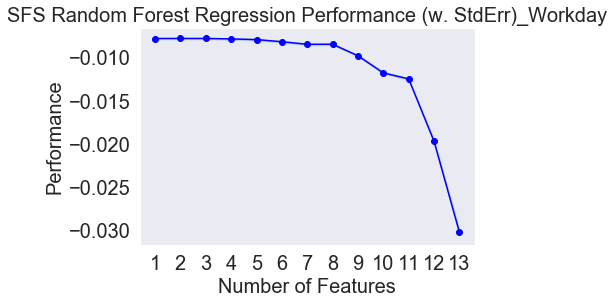

1    -0.00778955
2    -0.00778621
3    -0.00778584
4    -0.00783764
5    -0.00791848
6    -0.00816395
7    -0.00846142
8    -0.00845617
9    -0.00979183
10    -0.0117778
11    -0.0124713
12    -0.0197039
13    -0.0302405
Name: avg_score, dtype: object [('ShorPth',) ('DSTStrDen', 'ShorPth')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Fri')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Fri')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Fri')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Thu', 'DoW_Fri')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'D

In [43]:
plt.figure(figsize=(15, 30))
fig = plot_sfs(rf_wkday.get_metric_dict(), kind='std_err')
plt.grid()
plt.title('SFS Random Forest Regression Performance (w. StdErr)_Workday',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
plt.ylabel('Performance',fontsize=20)
plt.show()
rf_wkday_mtr=day=pd.DataFrame.from_dict(rf_wkday.get_metric_dict()).T 
print(rf_wkday_mtr['avg_score'],rf_wkday_mtr['feature_names'].values)

In [44]:
###transforming key featurs after SFS
X_wkdaytr_rf8=X_wkdaytr[['DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri']]
print(X_wkdaytr_rf8.head())
X_wkdayts_rf8=X_wkdayts[['DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri']]
print(X_wkdayts_rf8.head())

          DSTStrDen  DSTRailDen    ShorPth  DoW_Mon  DoW_Tue  DoW_Wed  \
45565  13309.186513    0.000000  18097.723        0        0        0   
41464   2186.370621    0.000000  28218.574        1        0        0   
22817  18081.107572    0.000000   8298.044        0        0        0   
13029   5307.496210    0.165623  21643.232        0        0        1   
23743  17158.319401    0.000000   7527.730        0        0        0   

       DoW_Thu  DoW_Fri  
45565        0        1  
41464        0        0  
22817        0        1  
13029        0        0  
23743        1        0  
          DSTStrDen  DSTRailDen    ShorPth  DoW_Mon  DoW_Tue  DoW_Wed  \
27504  10125.722764         0.0  12244.072        0        0        0   
17874  23904.197120         0.0   4679.861        0        0        0   
21152   8867.267590         0.0  15398.036        0        0        0   
43152  20738.316766         0.0   7351.749        0        0        0   
27512   4302.964676         0.0  17012.3

In [45]:
###building gridsearch cv RF model with key features 
rf_wkday_paragrid_1 = {
    'max_depth':[1,2,4,8,16,24,32,48,56,64],    
                }
print(rf_wkday_paragrid_1)
rf_Wkday_gs_1=GridSearchCV(
            rf,
            rf_wkday_paragrid_1,
            scoring='neg_mean_squared_error',
            cv=KF_wkday,
            return_train_score=True,
            n_jobs=-1
            )
print(rf_Wkday_gs_1)
rf_Wkday_gs_1.fit(X_wkdaytr_rf8,Y_wkdaytr)
print('Fit Done')

{'max_depth': [1, 2, 4, 8, 16, 24, 32, 48, 56, 64]}
GridSearchCV(cv=[(array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([   13,    14,    26, ..., 22540, 22552, 22554])),
                 (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([    4,    18,    19, ..., 22564, 22574, 22584])),
                 (array([    0,     1,     2, ..., 22591, 22592, 22594]),
                  array([    6,     8,    23, ..., 22586, 22588, 22593])),
                 (array([    0,     1,     2, ..., 22592, 22593, 22594]),
                  array([    5,     9,    29, ..., 22560, 22565, 22570])),
                 (array([    3,     4,     5, ..., 2259...
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                 

In [46]:
for i in range(len(rf_Wkday_gs_1.cv_results_['params'])):
    print(rf_Wkday_gs_1.cv_results_['params'][i], 'mse.:', rf_Wkday_gs_1.cv_results_['mean_test_score'][i])
print('Best score:', rf_Wkday_gs_1.best_score_)
print("Best parameters via GridSearch", rf_Wkday_gs_1.best_params_)
#rf_Wkday_gs_1_output=pd.DataFrame(rf_Wkday_gs_1.cv_results_)
#rf_Wkday_gs_1_hm=rf_Wkday_gs_1_output.pivot('param_max_depth','param_n_estimators','mean_test_score')
#hm_rf=sns.heatmap(rf_Wkday_gs_1_hm,linewidths=0.1,annot=True,cmap='RdBu_r',center=-0.0076,fmt='.5g')
#plt.show()

{'max_depth': 1} mse.: -0.10854647937555004
{'max_depth': 2} mse.: -0.08005478605090731
{'max_depth': 4} mse.: -0.05289761645110831
{'max_depth': 8} mse.: -0.033211271519141675
{'max_depth': 16} mse.: -0.011007052638523475
{'max_depth': 24} mse.: -0.008448741034322402
{'max_depth': 32} mse.: -0.008456181783336758
{'max_depth': 48} mse.: -0.008458396934885756
{'max_depth': 56} mse.: -0.008458396934885756
{'max_depth': 64} mse.: -0.008458396934885754
Best score: -0.008448741034322402
Best parameters via GridSearch {'max_depth': 24}


Best score: -0.008448741034322402
Best parameters via GridSearch {'max_depth': 24}


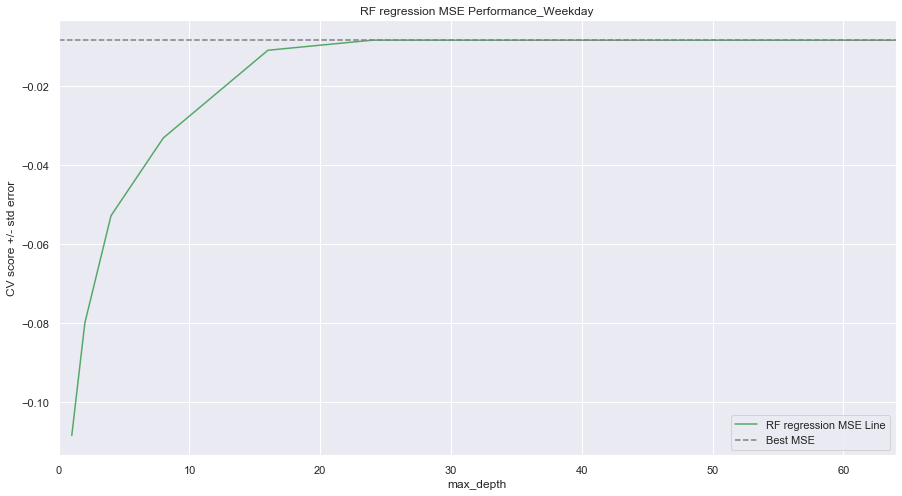

In [47]:
print('Best score:', rf_Wkday_gs_1.best_score_)
print("Best parameters via GridSearch", rf_Wkday_gs_1.best_params_)
rf_Wkday_gs_1_cvrsl=pd.DataFrame(rf_Wkday_gs_1.cv_results_)
x=rf_Wkday_gs_1_cvrsl['param_max_depth']
y=rf_Wkday_gs_1_cvrsl['mean_test_score']
#y_std = rf_Wkday_gs_1_cvrsl['std_test_score']
plt.figure(figsize=(15, 8))
plt.plot(x,y,label='RF regression MSE Line',c='g')
#std_error = y_std / np.sqrt(3)
#plt.plot(x, y + std_error, 'b-.')
#plt.plot(x, y - std_error, 'b-.')
plt.axhline(np.max(y), linestyle='--', color='.5',label='Best MSE')
plt.ylabel('CV score +/- std error')
plt.xlabel('max_depth')
plt.title('RF regression MSE Performance_Weekday')
plt.xlim([0, np.max(x)])
plt.legend()
plt.show()

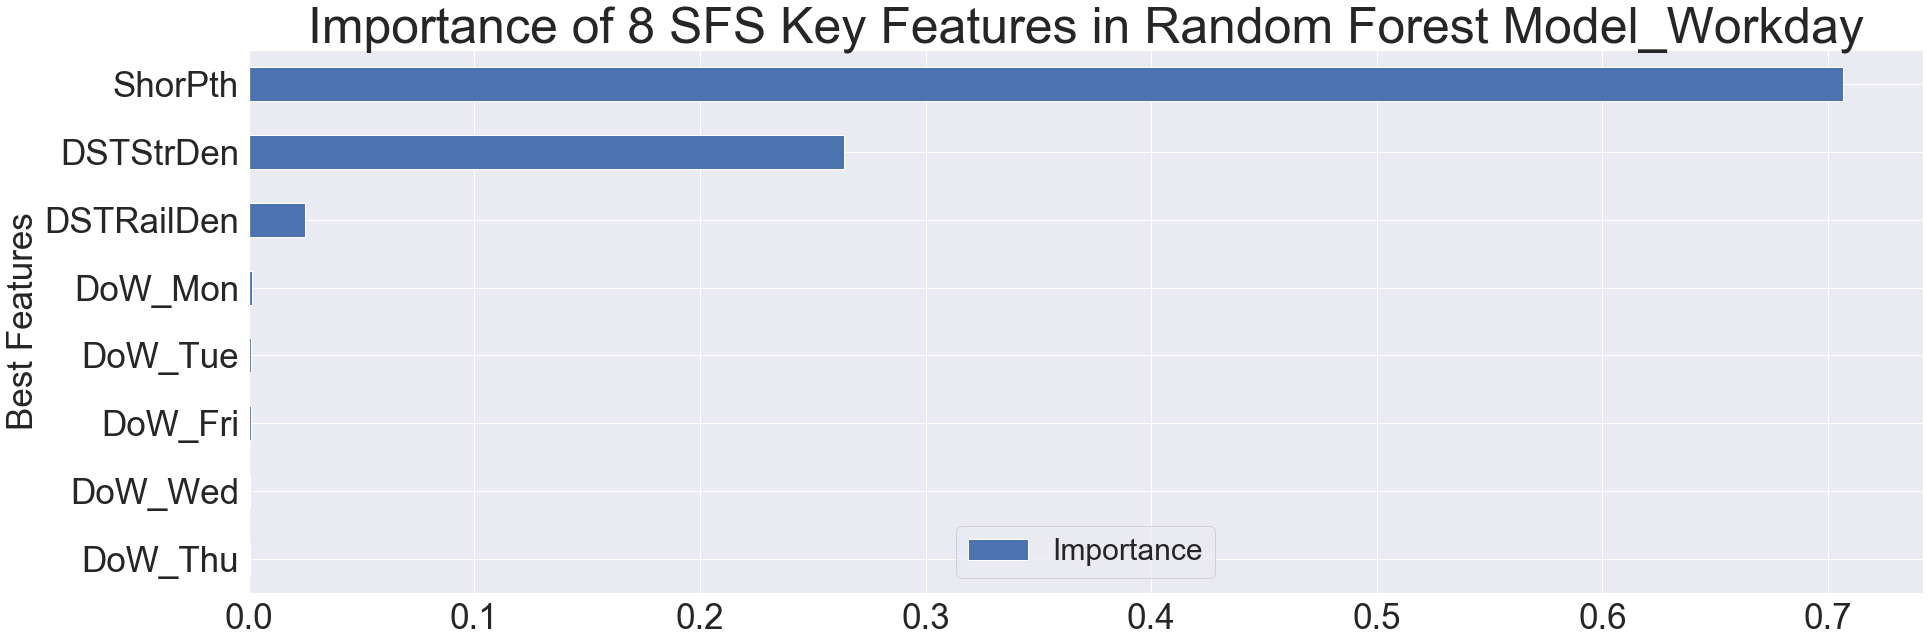

Done
Prediction MSE of 8 SFS Key Features in Random Forest Model_Weekday: 0.008024640362951307


In [48]:
rf_Wkday_k8=rf.set_params(**rf_Wkday_gs_1.best_params_).fit(X_wkdaytr_rf8,Y_wkdaytr)
importances = rf_Wkday_k8.feature_importances_
rf_Wkday_k8_imp=pd.DataFrame(data={'Importance':importances,'Best Features':X_wkdaytr_rf8.columns})
rf_Wkday_k8_imp=rf_Wkday_k8_imp.set_index('Best Features')
rf_Wkday_k8_imp=rf_Wkday_k8_imp.sort_values('Importance',ascending=True)
rf_Wkday_k8_imp.plot(kind='barh',figsize=(30,10))
plt.title('Importance of 8 SFS Key Features in Random Forest Model_Workday',fontsize=50)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel('Best Features',fontsize=35)
plt.legend(loc='lower center',fontsize=30)
plt.show()
Y_rf_Wkday_pred_8=rf_Wkday_gs_1.predict(X_wkdayts_rf8)
print('Done')
from sklearn.metrics import mean_squared_error
print('Prediction MSE of 8 SFS Key Features in Random Forest Model_Weekday:',mean_squared_error(Y_wkdayts,Y_rf_Wkday_pred_8))

In [49]:
###Random Forest with SFS_weekend
rf_wkend = SFS(estimator=rf, 
           k_features=X_wkendtr.shape[1], 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',n_jobs=-1,
           cv=KF_wkend)
print(rf_wkend)
rf_wkend.fit(X_wkendtr,Y_wkendtr)
print("Fit Done")

SequentialFeatureSelector(clone_estimator=True,
                          cv=[(array([    0,     3,     4, ..., 10442, 10444, 10445]),
                               array([    1,     2,     5, ..., 10440, 10441, 10443])),
                              (array([    1,     2,     3, ..., 10443, 10444, 10445]),
                               array([    0,     6,    16, ..., 10386, 10389, 10408])),
                              (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                               array([    8,    11,    28, ..., 10393, 10401, 10428])),
                              (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                               array([   37,    56,    59, ..., 10420, 1042...
                                                          max_features='log2',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                  

<Figure size 1080x2160 with 0 Axes>

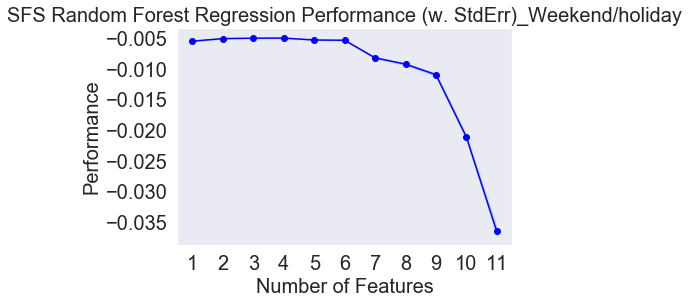

1    -0.00543957
2    -0.00502827
3    -0.00495451
4    -0.00494131
5    -0.00525154
6    -0.00529648
7    -0.00816989
8    -0.00920222
9      -0.010931
10    -0.0211176
11    -0.0365643
Name: avg_score, dtype: object [('ShorPth',) ('ShorPth', 'Month_Jan')
 ('DSTStrDen', 'ShorPth', 'Month_Jan')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'Month_Jan')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'Month_Jan', 'Month_Mar')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'Month_Jan', 'Month_Feb', 'Month_Mar')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'Month_Jan', 'Month_Feb', 'Month_Mar')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'Month_Jan', 'Month_Feb', 'Month_Mar')
 ('DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar')
 ('PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'DoW_HDY', 'DoW_Sat', 'DoW_

In [51]:
plt.figure(figsize=(15, 30))
fig = plot_sfs(rf_wkend.get_metric_dict(), kind='std_err')
plt.title('SFS Random Forest Regression Performance (w. StdErr)_Weekend/holiday',fontsize=20)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Features',fontsize=20)
plt.ylabel('Performance',fontsize=20)
plt.show()
rf_wkend_mtr=day=pd.DataFrame.from_dict(rf_wkend.get_metric_dict()).T 
print(rf_wkend_mtr['avg_score'],rf_wkend_mtr['feature_names'].values)

In [52]:
X_wkendtr_rf6=X_wkendtr[['DSTStrDen', 'DSTRailDen', 'ShorPth', 'Month_Jan', 'Month_Feb', 'Month_Mar']]
print(X_wkendtr_rf6.head())
X_wkendts_rf6=X_wkendts[['DSTStrDen', 'DSTRailDen', 'ShorPth', 'Month_Jan', 'Month_Feb', 'Month_Mar']]
print(X_wkendts_rf6.head())

          DSTStrDen  DSTRailDen    ShorPth  Month_Jan  Month_Feb  Month_Mar
10703   9538.542681         0.0  10861.897          1          0          0
37027   7856.957170         0.0  12427.456          0          0          1
7815    7382.135098         0.0   6722.084          1          0          0
3599   17622.085717         0.0  12164.610          0          1          0
32739  11353.765995         0.0  11078.130          0          0          1
          DSTStrDen  DSTRailDen    ShorPth  Month_Jan  Month_Feb  Month_Mar
31578  21961.455075    0.000000   3558.627          0          0          1
42048  14327.368921    0.000000   9891.369          0          1          0
2960   14047.519743    0.000000  11369.827          0          1          0
11688  27373.915334    0.000000  13024.145          1          0          0
11502  22605.887344    1.695493   1243.901          1          0          0


In [53]:
rf_wkend_paragrid_1 = {
    'max_depth':[1,2,4,8,16,24,32,48,56,64],    
                }
print(rf_wkend_paragrid_1)
rf_Wkend_gs_1=GridSearchCV(
            rf,
            rf_wkend_paragrid_1,
            scoring='neg_mean_squared_error',
            cv=KF_wkend,
            return_train_score=True,
            n_jobs=-1
            )
print(rf_Wkend_gs_1)
rf_Wkend_gs_1.fit(X_wkendtr_rf6,Y_wkendtr)
print('Fit Done')

{'max_depth': [1, 2, 4, 8, 16, 24, 32, 48, 56, 64]}
GridSearchCV(cv=[(array([    0,     3,     4, ..., 10442, 10444, 10445]),
                  array([    1,     2,     5, ..., 10440, 10441, 10443])),
                 (array([    1,     2,     3, ..., 10443, 10444, 10445]),
                  array([    0,     6,    16, ..., 10386, 10389, 10408])),
                 (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                  array([    8,    11,    28, ..., 10393, 10401, 10428])),
                 (array([    0,     1,     2, ..., 10443, 10444, 10445]),
                  array([   37,    56,    59, ..., 10420, 10426, 10432])),
                 (array([    0,     1,     2, ..., 10443...
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                

In [54]:
for i in range(len(rf_Wkend_gs_1.cv_results_['params'])):
    print(rf_Wkend_gs_1.cv_results_['params'][i], 'mse.:', rf_Wkend_gs_1.cv_results_['mean_test_score'][i])
print('Best score:', rf_Wkend_gs_1.best_score_)
print("Best parameters via GridSearch", rf_Wkend_gs_1.best_params_)

{'max_depth': 1} mse.: -0.11794083508655681
{'max_depth': 2} mse.: -0.09058229549306052
{'max_depth': 4} mse.: -0.06157446499259727
{'max_depth': 8} mse.: -0.03772624610140084
{'max_depth': 16} mse.: -0.007653338541164035
{'max_depth': 24} mse.: -0.005296504638917986
{'max_depth': 32} mse.: -0.005294413818735534
{'max_depth': 48} mse.: -0.005293887535868478
{'max_depth': 56} mse.: -0.00529388753586848
{'max_depth': 64} mse.: -0.005293887535868481
Best score: -0.005293887535868478
Best parameters via GridSearch {'max_depth': 48}


Best score: -0.005293887535868478
Best parameters via GridSearch {'max_depth': 48}


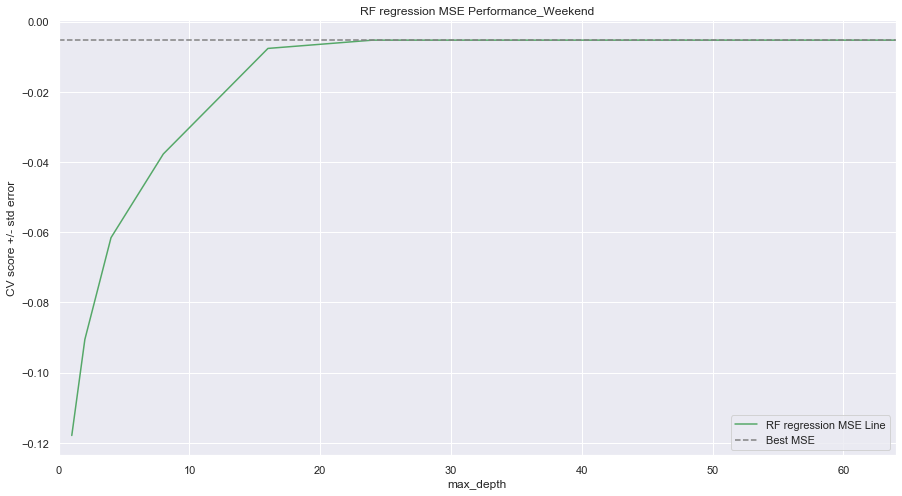

In [55]:
print('Best score:', rf_Wkend_gs_1.best_score_)
print("Best parameters via GridSearch", rf_Wkend_gs_1.best_params_)
rf_Wkend_gs_1_cvrsl=pd.DataFrame(rf_Wkend_gs_1.cv_results_)
x=rf_Wkend_gs_1_cvrsl['param_max_depth']
y=rf_Wkend_gs_1_cvrsl['mean_test_score']
#y_std = rf_Wkend_gs_1_cvrsl['std_test_score']
plt.figure(figsize=(15, 8))
plt.plot(x,y,label='RF regression MSE Line',c='g')
#std_error = y_std / np.sqrt(3)
#plt.plot(x, y + std_error, 'b-.')
#plt.plot(x, y - std_error, 'b-.')
plt.axhline(np.max(y), linestyle='--', color='.5',label='Best MSE')
plt.ylabel('CV score +/- std error')
plt.xlabel('max_depth')
plt.title('RF regression MSE Performance_Weekend')
plt.xlim([0, np.max(x)])
plt.legend()
plt.show()

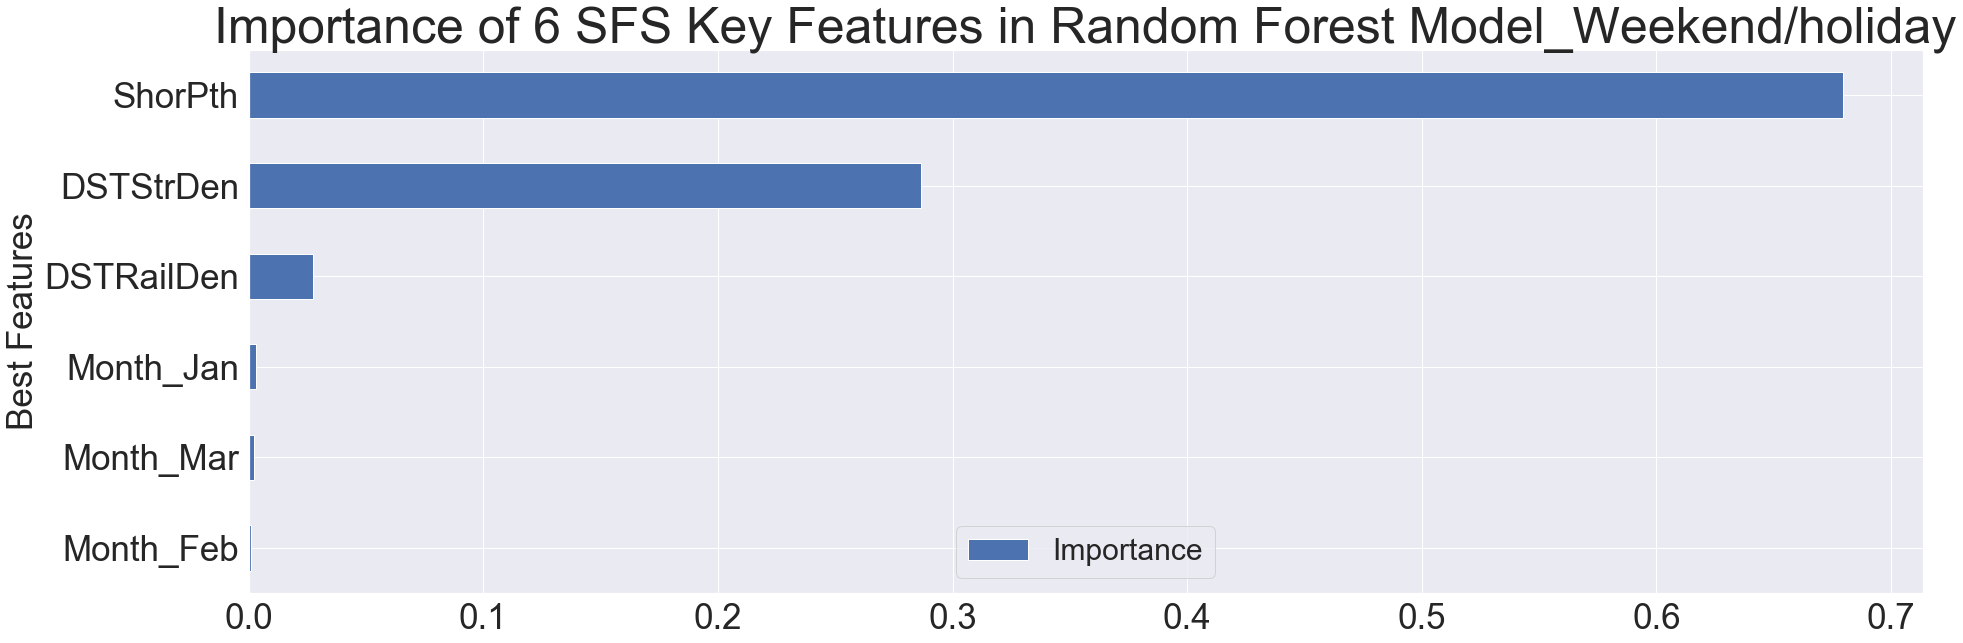

Done
Prediction MSE of 6 SFS Key Features in Random Forest Model_Weekend/holiday: 0.0054451738836305726


In [56]:
rf_Wkend_k6=rf.set_params(**rf_Wkend_gs_1.best_params_).fit(X_wkendtr_rf6,Y_wkendtr)
importances = rf_Wkend_k6.feature_importances_
rf_Wkend_k6_imp=pd.DataFrame(data={'Importance':importances,'Best Features':X_wkendtr_rf6.columns})
rf_Wkend_k6_imp=rf_Wkend_k6_imp.set_index('Best Features')
rf_Wkend_k6_imp=rf_Wkend_k6_imp.sort_values('Importance',ascending=True)
rf_Wkend_k6_imp.plot(kind='barh',figsize=(30,10))
plt.title('Importance of 6 SFS Key Features in Random Forest Model_Weekend/holiday',fontsize=50)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel('Best Features',fontsize=35)
plt.legend(loc='lower center',fontsize=30)
plt.show()
Y_rf_Wkend_pred_6=rf_Wkend_gs_1.predict(X_wkendts_rf6)
print('Done')
from sklearn.metrics import mean_squared_error
print('Prediction MSE of 6 SFS Key Features in Random Forest Model_Weekend/holiday:',mean_squared_error(Y_wkendts,Y_rf_Wkend_pred_6))

In [57]:
#. Prediction comparison
##.Weekday
output={'Y_wkday_ts':Y_wkdayts,'Y_wkday_rlmpred':Y_hr3_wkday,'Y_wkday_rfpred':Y_rf_Wkday_pred_8}
df_pred=pd.DataFrame(data=output)
df_pred['Day of Week']=wkday_ts['Day of Week'].to_numpy()
df_pred=df_pred.melt(id_vars=['Day of Week'], value_vars=['Y_wkday_ts', 'Y_wkday_rlmpred','Y_wkday_rfpred'])
df_pred.head()

,Day of Week,variable,value
0,4,Y_wkday_ts,7.766417
1,4,Y_wkday_ts,6.974479
2,3,Y_wkday_ts,7.379632
3,4,Y_wkday_ts,7.206377
4,4,Y_wkday_ts,7.381502


Text(0, 0.5, 'Log_Mean Travel Time')

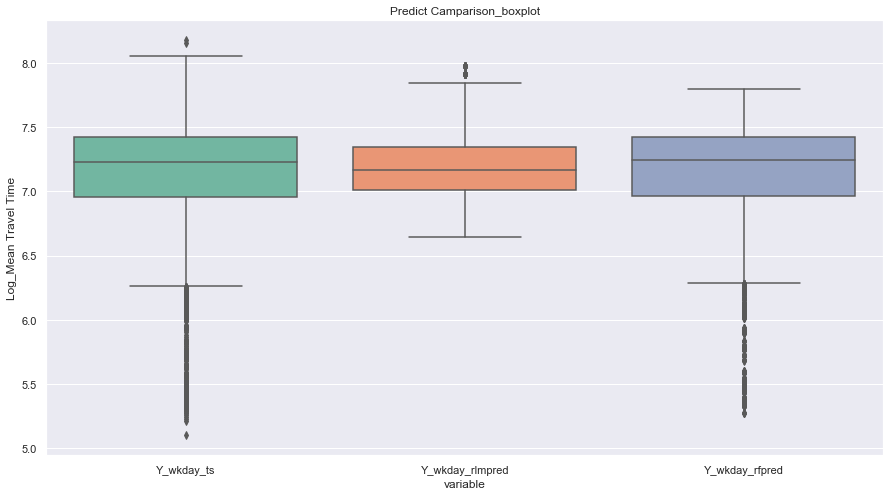

In [58]:
plt.figure(figsize=(15, 8))
ax1 = sns.boxplot(x='variable',y='value',data=df_pred, orient="v", palette="Set2")
plt.title('Predict Camparison_boxplot')
plt.ylabel('Log_Mean Travel Time')

Text(0, 0.5, 'Log_Mean Travel Time')

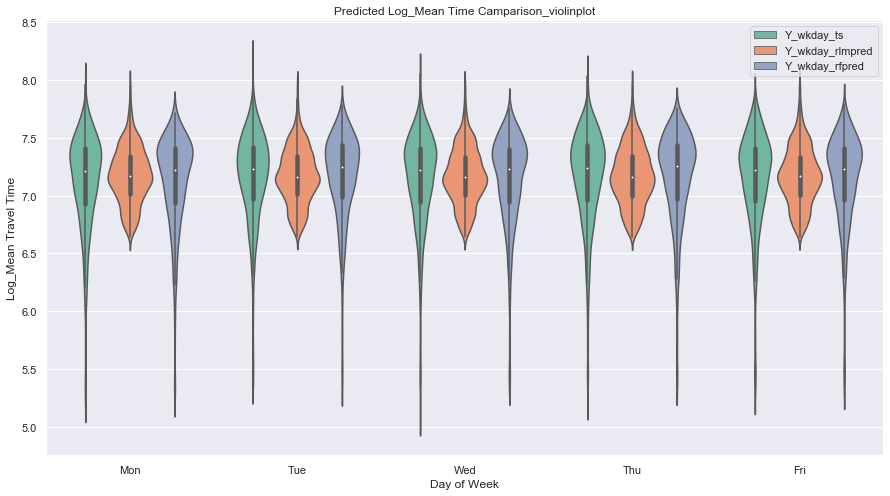

In [59]:
plt.figure(figsize=(15, 8))
ax1 = sns.violinplot(x='Day of Week',y='value',hue="variable",data=df_pred, orient="v", palette="Set2")
plt.xticks([0,1,2,3,4],['Mon', 'Tue','Wed', 'Thu', 'Fri'])
plt.title('Predicted Log_Mean Time Camparison_violinplot')
plt.legend(loc='best')
plt.ylabel('Log_Mean Travel Time')

In [60]:
output={'Y_wkend_ts':Y_wkendts,'Y_wkend_rlmpred':Y_hr3_wkend_pred,'Y_wkend_rfpred':Y_rf_Wkend_pred_6}
df_pred_wkend=pd.DataFrame(data=output)
df_pred_wkend['Day of Week']=wkend_ts['Day of Week'].to_numpy()
df_pred_wkend=df_pred_wkend.melt(id_vars=['Day of Week'], value_vars=['Y_wkend_ts', 'Y_wkend_rlmpred','Y_wkend_rfpred'])
df_pred_wkend.head()

,Day of Week,variable,value
0,5,Y_wkend_ts,6.870053
1,6,Y_wkend_ts,6.815640
2,6,Y_wkend_ts,7.033506
3,5,Y_wkend_ts,7.634337
4,5,Y_wkend_ts,5.267858


Text(0, 0.5, 'Log_Mean Travel Time')

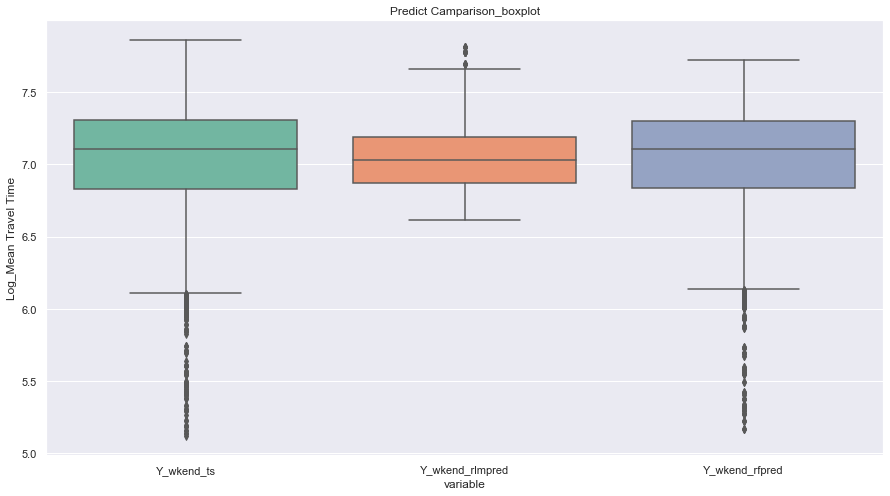

In [61]:
plt.figure(figsize=(15, 8))
ax1 = sns.boxplot(x='variable',y='value',data=df_pred_wkend, orient="v", palette="Set2")
plt.title('Predict Camparison_boxplot')
plt.ylabel('Log_Mean Travel Time')

Text(0, 0.5, 'Log_Mean Travel Time')

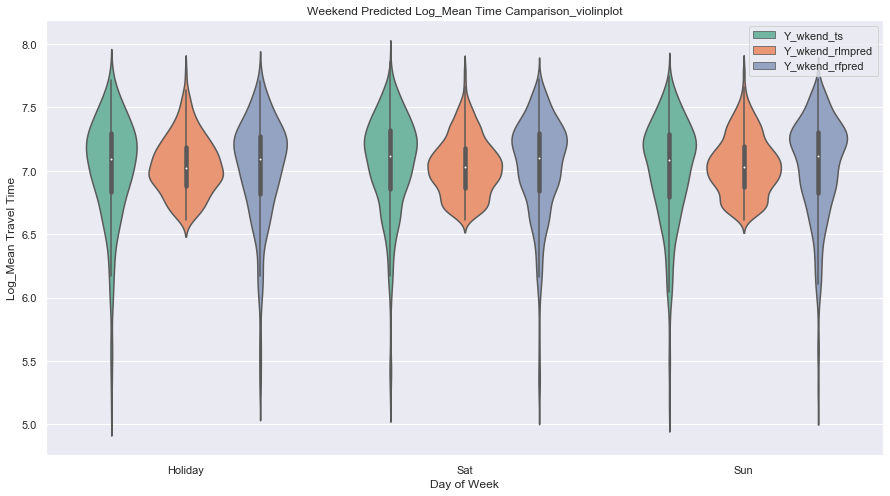

In [62]:
plt.figure(figsize=(15, 8))
ax1 = sns.violinplot(x='Day of Week',y='value',hue="variable",data=df_pred_wkend, orient="v", palette="Set2")
plt.xticks([0,1,2],['Holiday','Sat','Sun'])
plt.title('Weekend Predicted Log_Mean Time Camparison_violinplot')
plt.legend(loc='best')
plt.ylabel('Log_Mean Travel Time')